## Задание.

Напишите нейронную сеть на базе болезней и добейтесь хорошей точности.

Хорошей точностью на уроке назвали 50%+. Я воспользуюсь основой про-задания. Надеюсь не придется многое менять.


In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q '/content/drive/My Drive/Болезни.zip' -d /content/texts

In [0]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read().replace('\n', ' ')
  return text

className = ["Аппендицит", "Гастрит", "Гепатит", "Дуоденит", "Колит", "Панкреатит", 'Холицестит', 'Эзофагит', 'Энтерит', 'Язва']
nClasses = len(className)

In [0]:
df = pd.DataFrame(columns=['data', 'category'])
for i in className:
  fileName = 'texts/Болезни/' + i + '.txt'
  text = readText(fileName)
  group = text.split('  ')
  for h in group:
    if len(h.replace(' ', '')) > 5:
      df = df.append({'data': h, 'category': i}, ignore_index=True)
df.shape

(380, 2)

In [0]:
maxWordsCount = 20000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(df['data'].tolist())
X = tokenizer.texts_to_sequences(df['data'].tolist())
class_clean = df['category'].tolist()
encoder = LabelEncoder()
encoder.fit(class_clean)
classesEncoded = encoder.transform(class_clean) #кодируем категории
yAll = utils.to_categorical(classesEncoded, nClasses)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, yAll, test_size=0.15)

In [0]:
xTrain01 = tokenizer.sequences_to_matrix(x_train)
xTest01 = tokenizer.sequences_to_matrix(x_test)

In [0]:
xTrain01.shape

(323, 20000)

Epoch 1/10
3/3 [==============================] - 0s 60ms/step - loss: 2.2955 - accuracy: 0.1765 - val_loss: 2.2820 - val_accuracy: 0.3158
Epoch 2/10
3/3 [==============================] - 0s 14ms/step - loss: 1.7753 - accuracy: 0.7028 - val_loss: 2.2647 - val_accuracy: 0.4211
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 1.6458 - accuracy: 0.8266 - val_loss: 2.2511 - val_accuracy: 0.4737
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 1.5826 - accuracy: 0.8885 - val_loss: 2.2392 - val_accuracy: 0.5263
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 1.5282 - accuracy: 0.8978 - val_loss: 2.2278 - val_accuracy: 0.5439
Epoch 6/10
3/3 [==============================] - 0s 14ms/step - loss: 1.4944 - accuracy: 0.9133 - val_loss: 2.2166 - val_accuracy: 0.5263
Epoch 7/10
3/3 [==============================] - 0s 15ms/step - loss: 1.4552 - accuracy: 0.8978 - val_loss: 2.2058 - val_accuracy: 0.5088
Epoch 8/10
3/3 [===========

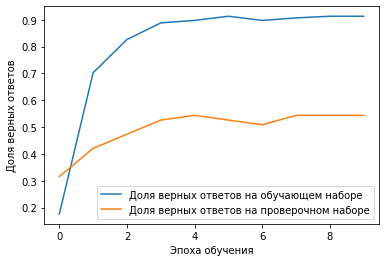

In [0]:
model01 = Sequential()
model01.add(Dense(200, input_dim=20000, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(nClasses, activation='sigmoid'))
model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model01.fit(xTrain01, 
                      y_train, 
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, y_test))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#### Итог.

Ну и славненько. Результат конечно на грани, но извините, не успеваю с работой и детьми. Считаю что выполнил ДЗ 4ой недели на 100%